In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
# Download maximum available MSFT data
msft = yf.download('MSFT', period='max')

# Save it to CSV if you want
msft.to_csv('MSFT_stock_data_max.csv')

print(msft.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open      Volume
Ticker          MSFT      MSFT      MSFT      MSFT        MSFT
Date                                                          
1986-03-13  0.059707  0.062373  0.054376  0.054376  1031788800
1986-03-14  0.061839  0.062906  0.059707  0.059707   308160000
1986-03-17  0.062906  0.063439  0.061839  0.061839   133171200
1986-03-18  0.061306  0.063439  0.060773  0.062906    67766400
1986-03-19  0.060240  0.061839  0.059707  0.061306    47894400


In [4]:
df = pd.read_csv('MSFT_stock_data_max.csv')
df.rename(columns={'Price': 'Date'}, inplace=True)
df

,Date,Close,High,Low,Open,Volume
0,Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
1,Date,NaN,NaN,NaN,NaN,NaN
2,1986-03-13,0.059707023203372955,0.06237296421274033,0.05437636745371823,0.05437636745371823,1031788800
3,1986-03-14,0.061839278787374496,0.06290602295599505,0.05970701671908022,0.05970701671908022,308160000
4,1986-03-17,0.06290603429079056,0.06343909990391516,0.06183928992995746,0.06183928992995746,133171200
...,...,...,...,...,...,...
9849,2025-04-11,388.45001220703125,390.04998779296875,378.8900146484375,380.6400146484375,23839200
9850,2025-04-14,387.80999755859375,394.6499938964844,384.2099914550781,393.2200012207031,19251200
9851,2025-04-15,385.7300109863281,391.8900146484375,384.1600036621094,388.510009765625,17199900
9852,2025-04-16,371.6099853515625,381.6099853515625,368.0,380.6700134277344,21967800


In [5]:

# Step 1: Drop the first two rows
df = df.drop([0, 1])

# Step 2: Reset the index
df = df.reset_index(drop=True)

# Now df starts from real data
print(df.head())
df = df[['Date','Close']]

         Date                 Close                 High                  Low  \
0  1986-03-13  0.059707023203372955  0.06237296421274033  0.05437636745371823   
1  1986-03-14  0.061839278787374496  0.06290602295599505  0.05970701671908022   
2  1986-03-17   0.06290603429079056  0.06343909990391516  0.06183928992995746   
3  1986-03-18   0.06130621209740639  0.06343908725936848   0.0607731465905313   
4  1986-03-19   0.06024009361863136  0.06183929047202328  0.05970702800083405   

                   Open      Volume  
0   0.05437636745371823  1031788800  
1   0.05970701671908022   308160000  
2   0.06183928992995746   133171200  
3   0.06290602175249338    67766400  
4  0.061306224854225974    47894400  


In [6]:
df['Date']

,Date
0,1986-03-13
1,1986-03-14
2,1986-03-17
3,1986-03-18
4,1986-03-19
...,...
9847,2025-04-11
9848,2025-04-14
9849,2025-04-15
9850,2025-04-16


In [7]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [8]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

,Date
0,1986-03-13
1,1986-03-14
2,1986-03-17
3,1986-03-18
4,1986-03-19
...,...
9847,2025-04-11
9848,2025-04-14
9849,2025-04-15
9850,2025-04-16


In [9]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.059707023203372955
1986-03-14,0.061839278787374496
1986-03-17,0.06290603429079056
1986-03-18,0.06130621209740639
1986-03-19,0.06024009361863136
...,...
2025-04-11,388.45001220703125
2025-04-14,387.80999755859375
2025-04-15,385.7300109863281


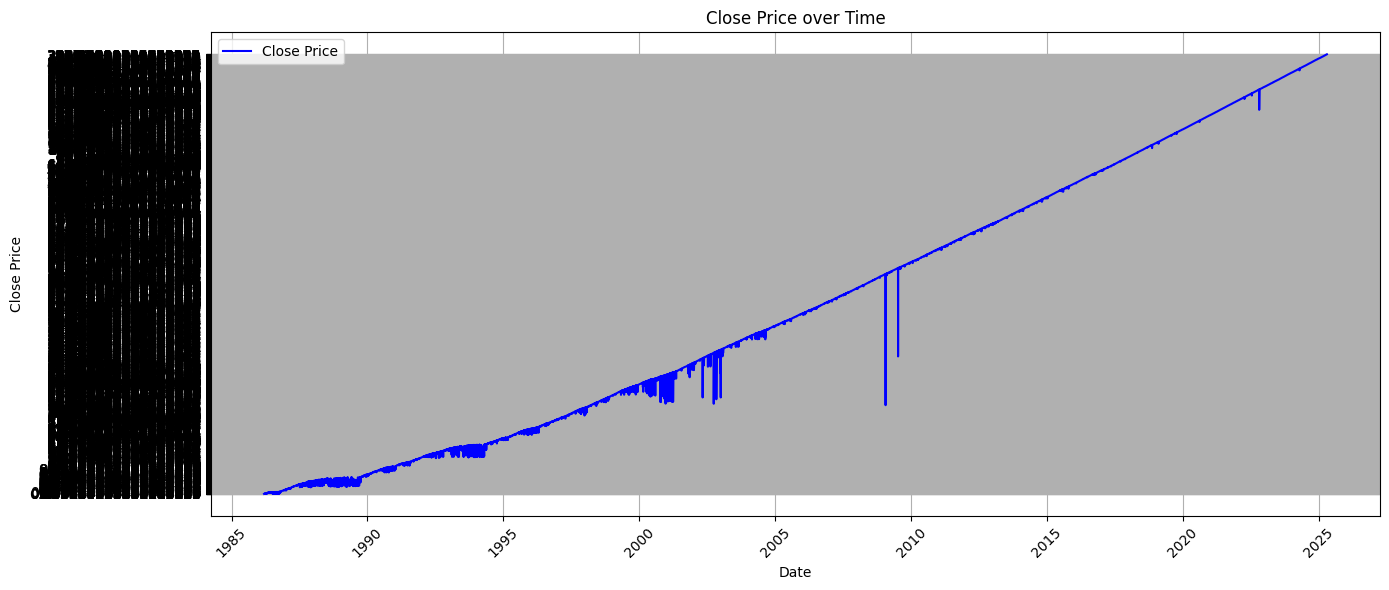

In [10]:
import matplotlib.pyplot as plt

# Make sure the index is datetime
df.index = pd.to_datetime(df.index)

# Set the figure size
plt.figure(figsize=(14,6))

# Plot
plt.plot(df.index, df['Close'], label='Close Price', color='blue')

# Beautify the x-axis
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price over Time')
plt.grid(True)
plt.legend()

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [11]:
import numpy as np
import pandas as pd

def df_to_windowed_df_fast(dataframe, first_date_str, last_date_str, n=3):
    # Filter dates first
    dataframe = dataframe.copy()
    dataframe = dataframe.loc[first_date_str:last_date_str]

    # Ensure the dataframe is sorted
    dataframe = dataframe.sort_index()

    X = []
    Y = []
    dates = []

    close_values = dataframe['Close'].to_numpy()
    date_index = dataframe.index

    for i in range(len(close_values) - n):
        x = close_values[i:i+n]
        y = close_values[i+n]
        target_date = date_index[i+n]

        X.append(x)
        Y.append(y)
        dates.append(target_date)

    # Create the DataFrame
    X = np.array(X)
    result_df = pd.DataFrame(X, columns=[f'Target-{n-i}' for i in range(n)])
    result_df['Target'] = Y
    result_df['Target Date'] = dates
    result_df = result_df[['Target Date'] + [f'Target-{n-i}' for i in range(n)] + ['Target']]

    return result_df

# Example Usage
windowed_df = df_to_windowed_df_fast(df,
                                     '2024-03-25',
                                     '2025-03-23',
                                     n=3)
windowed_df


,Target Date,Target-3,Target-2,Target-1,Target
0,2024-03-28,419.6560363769531,418.4552307128906,418.2369079589844,417.53228759765625
1,2024-04-01,418.4552307128906,418.2369079589844,417.53228759765625,421.3531188964844
2,2024-04-02,418.2369079589844,417.53228759765625,421.3531188964844,418.2468566894531
3,2024-04-03,417.53228759765625,421.3531188964844,418.2468566894531,417.26434326171875
4,2024-04-04,421.3531188964844,418.2468566894531,417.26434326171875,414.7138366699219
...,...,...,...,...,...
241,2025-03-17,383.2699890136719,378.7699890136719,388.55999755859375,388.70001220703125
242,2025-03-18,378.7699890136719,388.55999755859375,388.70001220703125,383.5199890136719
243,2025-03-19,388.55999755859375,388.70001220703125,383.5199890136719,387.82000732421875
244,2025-03-20,388.70001220703125,383.5199890136719,387.82000732421875,386.8399963378906


In [12]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((246,), (246, 3, 1), (246,))

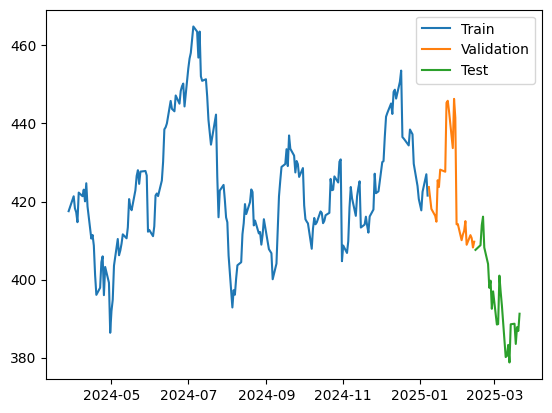

In [13]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [18]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers

scaler = MinMaxScaler()

# Fit scaler on training targets
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50
)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 179974.7969 - val_loss: 178487.9062
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 179476.7188 - val_loss: 178193.8750
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 178823.7812 - val_loss: 178064.5469
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 177993.8438 - val_loss: 177844.0469
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 177863.0312 - val_loss: 177566.2969
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 177158.9062 - val_loss: 176861.3594
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 177340.7344 - val_loss: 176616.6406
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 177010.2812 - val_loss: 176260.6250
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 176764.4062 - val_loss: 176073.4062
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 176071.1406 - val_loss: 175911.2656
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 177216.3125

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.2524 - val_loss: 0.1591
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1580 - val_loss: 0.0717
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0613 - val_loss: 0.0174
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0208 - val_loss: 0.0378
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0218 - val_loss: 0.0170
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0167 - val_loss: 0.0187
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0180 - val_loss: 0.0166
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0125 - val_loss: 0.0193
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0114 - val_loss: 0.0165
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0120 - val_loss: 0.0160
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - val_loss: 0.0166
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0103 - val_lo

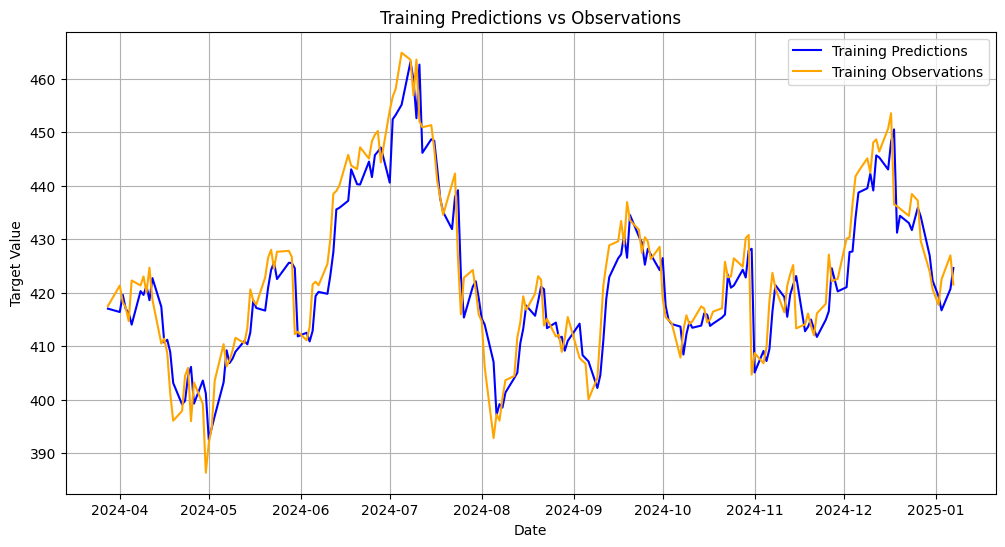

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers

# 1. Prepare Data
dates, X, y = windowed_df_to_date_X_y(windowed_df)

q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

# 2. Scale both X and y
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# Reshape X_train for scaler (because it needs 2D)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

X_train_scaled = X_scaler.fit_transform(X_train_flat).reshape(X_train.shape)
X_val_scaled = X_scaler.transform(X_val_flat).reshape(X_val.shape)
X_test_scaled = X_scaler.transform(X_test_flat).reshape(X_test.shape)

y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

# 3. Build Model (slightly deeper network)
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1], 1)),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# 4. Train Model
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=200,
    verbose=1
)

# 5. Predict and Inverse Scale
train_predictions = model.predict(X_train_scaled)
train_predictions = y_scaler.inverse_transform(train_predictions)

# 6. Plot
plt.figure(figsize=(12, 6))
plt.plot(dates_train, train_predictions, label='Training Predictions', color='blue')
plt.plot(dates_train, y_train, label='Training Observations', color='orange')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.title('Training Predictions vs Observations')
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


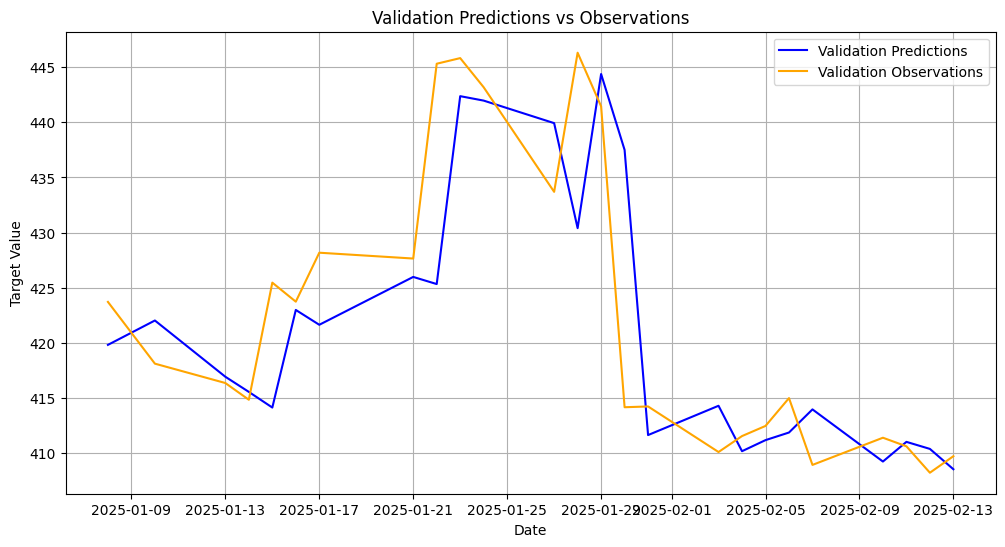

In [22]:
# 1. Scale the validation data
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_val_scaled = X_scaler.transform(X_val_flat).reshape(X_val.shape)

# 2. Predict using the scaled validation data
val_predictions = model.predict(X_val_scaled).flatten()

# 3. Inverse scale the predictions
val_predictions = y_scaler.inverse_transform(val_predictions.reshape(-1, 1))

# 4. Plot
plt.figure(figsize=(12, 6))
plt.plot(dates_val, val_predictions, label='Validation Predictions', color='blue')
plt.plot(dates_val, y_val, label='Validation Observations', color='orange')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.title('Validation Predictions vs Observations')
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


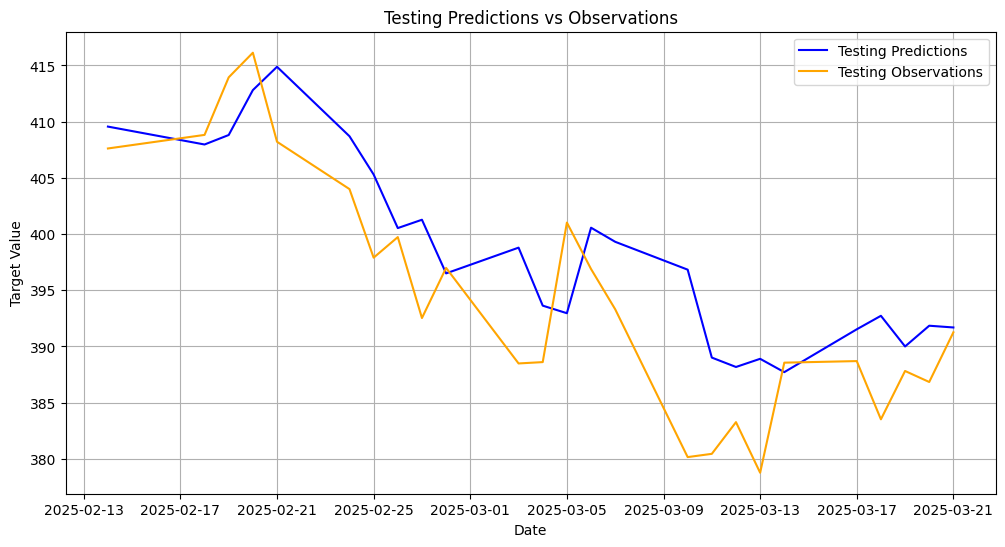

In [24]:
# 1. Scale the test data
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_test_scaled = X_scaler.transform(X_test_flat).reshape(X_test.shape)

# 2. Predict using the scaled test data
test_predictions = model.predict(X_test_scaled).flatten()

# 3. Inverse scale the predictions
test_predictions = y_scaler.inverse_transform(test_predictions.reshape(-1, 1))

# 4. Plot
plt.figure(figsize=(12, 6))
plt.plot(dates_test, test_predictions, label='Testing Predictions', color='blue')
plt.plot(dates_test, y_test, label='Testing Observations', color='orange')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.title('Testing Predictions vs Observations')
plt.grid(True)
plt.show()


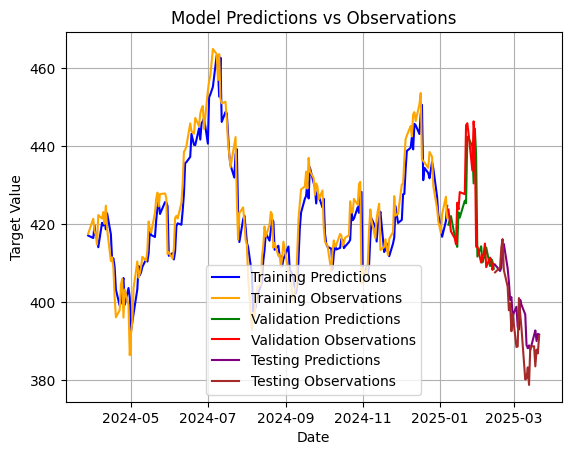

In [25]:
# 1. Plot Training Predictions vs Observations
plt.plot(dates_train, train_predictions, label='Training Predictions', color='blue')
plt.plot(dates_train, y_train, label='Training Observations', color='orange')

# 2. Plot Validation Predictions vs Observations
plt.plot(dates_val, val_predictions, label='Validation Predictions', color='green')
plt.plot(dates_val, y_val, label='Validation Observations', color='red')

# 3. Plot Testing Predictions vs Observations
plt.plot(dates_test, test_predictions, label='Testing Predictions', color='purple')
plt.plot(dates_test, y_test, label='Testing Observations', color='brown')

# 4. Add labels, legend, title, and grid
plt.legend()
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.title('Model Predictions vs Observations')
plt.grid(True)

# 5. Show the plot
plt.show()


Training MSE: 30.454833984375
Validation MSE: 61.47499465942383
Testing MSE: 43.513675689697266
Recursive MSE: 411.8233947753906
Training MAE: 4.211170673370361
Validation MAE: 5.036326885223389
Testing MAE: 5.355416297912598
Recursive MAE: 19.00998878479004


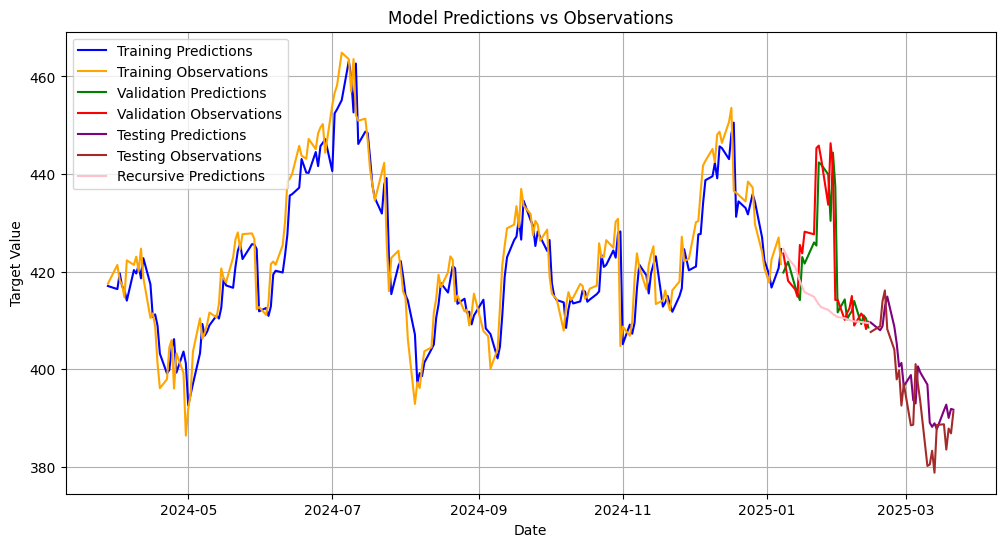

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Ensure recursive predictions match the length of y_test for evaluation
num_predictions = min(len(y_test), len(recursive_predictions))  # Match the length of y_test
recursive_predictions = recursive_predictions[:num_predictions]  # Truncate if necessary

# Evaluate performance (MSE and MAE) for Training, Validation, Testing, and Recursive Predictions
train_mse = mean_squared_error(y_train, train_predictions)
val_mse = mean_squared_error(y_val, val_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
recursive_mse = mean_squared_error(y_test[:num_predictions], recursive_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
val_mae = mean_absolute_error(y_val, val_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
recursive_mae = mean_absolute_error(y_test[:num_predictions], recursive_predictions)

# Print performance metrics
print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {val_mse}')
print(f'Testing MSE: {test_mse}')
print(f'Recursive MSE: {recursive_mse}')

print(f'Training MAE: {train_mae}')
print(f'Validation MAE: {val_mae}')
print(f'Testing MAE: {test_mae}')
print(f'Recursive MAE: {recursive_mae}')

# Plot all predictions vs observations
plt.figure(figsize=(12, 6))
plt.plot(dates_train, train_predictions, label='Training Predictions', color='blue')
plt.plot(dates_train, y_train, label='Training Observations', color='orange')
plt.plot(dates_val, val_predictions, label='Validation Predictions', color='green')
plt.plot(dates_val, y_val, label='Validation Observations', color='red')
plt.plot(dates_test, test_predictions, label='Testing Predictions', color='purple')
plt.plot(dates_test, y_test, label='Testing Observations', color='brown')
plt.plot(recursive_dates[:num_predictions], recursive_predictions, label='Recursive Predictions', color='pink')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.title('Model Predictions vs Observations')
plt.grid(True)
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 1.0187 - val_loss: 0.4971
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3952 - val_loss: 0.1908
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1512 - val_loss: 0.0772
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0589 - val_loss: 0.0367
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0239 - val_loss: 0.0204
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0099 - val_loss: 0.0136
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0041 - val_loss: 0.0101
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017 - val_loss: 0.0091
Epoch 9/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 6.4149e-04 - val_loss: 0.0075
Epoch 10/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.5719e-04 - val_loss: 0.0101
Epoch 11/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.2698e-04 - val_loss: 0.0104
Epoch 12/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9

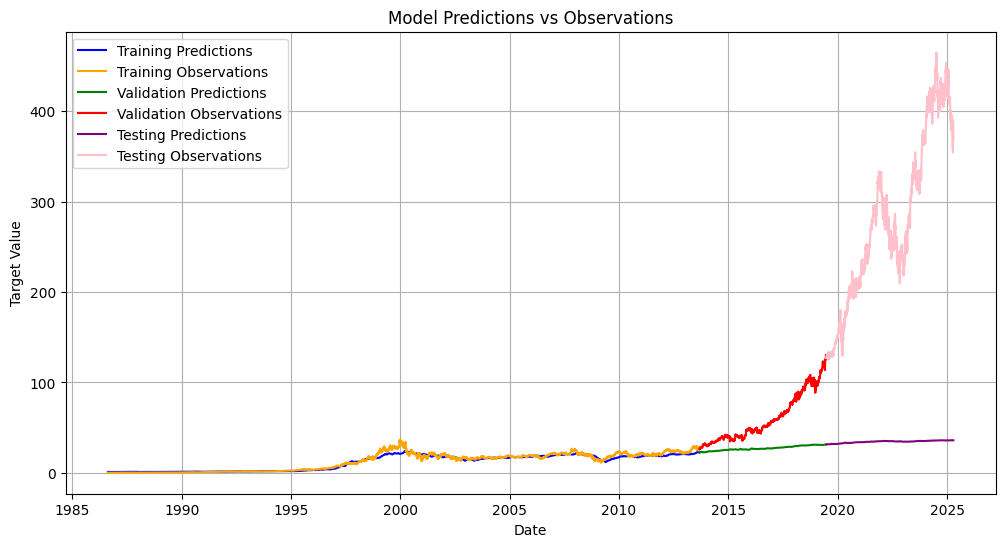

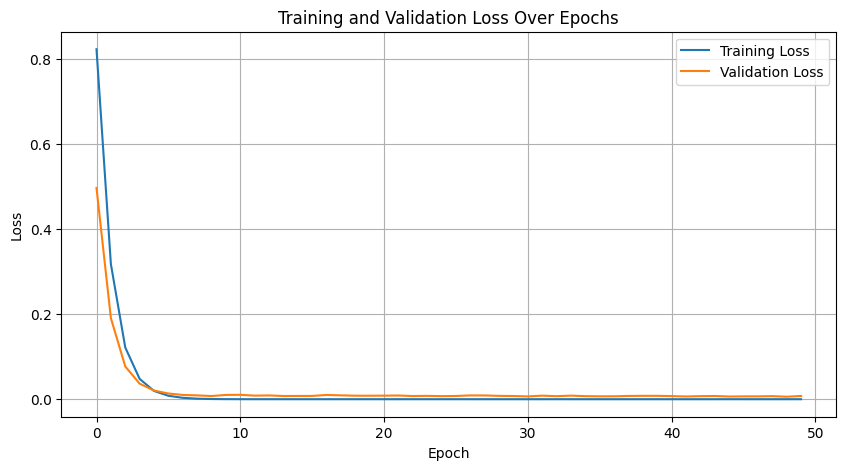

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# 1. Download and Prepare Data
msft = yf.Ticker("MSFT")
data = msft.history(period="max")
data = data[['Close']].copy()

# 2. Feature Engineering: Add Technical Indicators and External Features
def compute_rsi(data, periods=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=periods).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=periods).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data['MA10'] = data['Close'].rolling(window=10).mean()  # 10-day moving average
data['MA50'] = data['Close'].rolling(window=50).mean()  # 50-day moving average
data['RSI'] = compute_rsi(data['Close'], 14)  # Relative Strength Index
data['Volatility'] = data['Close'].rolling(window=20).std()  # 20-day volatility

# Add an external feature: S&P 500 Index as a proxy for market trends
sp500 = yf.Ticker("^GSPC").history(period="max")
sp500 = sp500[['Close']].rename(columns={'Close': 'SP500'})
data = data.join(sp500, how='inner')

# Drop NaN values after feature engineering
data = data.dropna()

# 3. Normalize the Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close', 'MA10', 'MA50', 'RSI', 'Volatility', 'SP500']])
close_scaler = MinMaxScaler()
close_scaler.fit(data[['Close']])  # Separate scaler for inverse transform of Close

# 4. Create Windowed Dataset
def create_windowed_dataset(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i, 0])  # Target is the Close price
    return np.array(X), np.array(y)

window_size = 60
X, y = create_windowed_dataset(scaled_data, window_size)

# 5. Split Data into Train, Validation, and Test Sets
train_end = int(len(X) * 0.7)
val_end = int(len(X) * 0.85)

X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

# 6. Build and Train the Improved LSTM Model with More Regularization
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, 6), kernel_regularizer=l2(0.01)),
    Dropout(0.3),  # Increased Dropout
    LSTM(50, return_sequences=False, kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(25, kernel_regularizer=l2(0.01)),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')  # Lower learning rate
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64, verbose=1)

# 7. Make Predictions
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)
test_predict = model.predict(X_test)

# Inverse Transform Predictions
train_predict = close_scaler.inverse_transform(train_predict)
val_predict = close_scaler.inverse_transform(val_predict)
test_predict = close_scaler.inverse_transform(test_predict)
y_train_inv = close_scaler.inverse_transform([y_train])[0]
y_val_inv = close_scaler.inverse_transform([y_val])[0]
y_test_inv = close_scaler.inverse_transform([y_test])[0]

# 8. Calculate Metrics
train_mse = mean_squared_error(y_train_inv, train_predict)
val_mse = mean_squared_error(y_val_inv, val_predict)
test_mse = mean_squared_error(y_test_inv, test_predict)
train_mae = mean_absolute_error(y_train_inv, train_predict)
val_mae = mean_absolute_error(y_val_inv, val_predict)
test_mae = mean_absolute_error(y_test_inv, test_predict)

print(f"Training MSE: {train_mse:.2f}, MAE: {train_mae:.2f}")
print(f"Validation MSE: {val_mse:.2f}, MAE: {val_mae:.2f}")
print(f"Testing MSE: {test_mse:.2f}, MAE: {test_mae:.2f}")

# 9. Plot Predictions vs. Observations
dates = data.index[window_size:]
train_dates = dates[:train_end]
val_dates = dates[train_end:val_end]
test_dates = dates[val_end:]

plt.figure(figsize=(12, 6))
plt.plot(train_dates, train_predict, label='Training Predictions', color='blue')
plt.plot(train_dates, y_train_inv, label='Training Observations', color='orange')
plt.plot(val_dates, val_predict, label='Validation Predictions', color='green')
plt.plot(val_dates, y_val_inv, label='Validation Observations', color='red')
plt.plot(test_dates, test_predict, label='Testing Predictions', color='purple')
plt.plot(test_dates, y_test_inv, label='Testing Observations', color='pink')
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.title('Model Predictions vs Observations')
plt.legend()
plt.grid()
plt.show()

# 10. Plot Training and Validation Loss to Diagnose Overfitting
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

Starting Price for Monte Carlo Simulation: $367.78


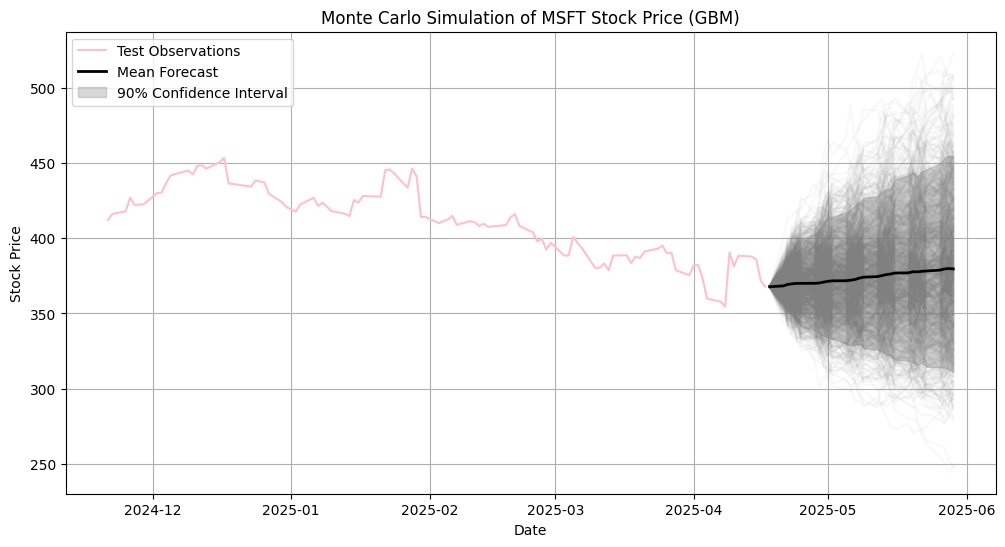

Monte Carlo Simulation Results (Day 30):
Mean Forecasted Price: $379.67
Median Forecasted Price: $377.43
90% Confidence Interval: $311.05 - $454.61
Expected Return over 30 days: 3.23%
Value at Risk (VaR) at 95% Confidence Level: $56.73
Probability of Price Dropping Below $331.00 (10% below current): 13.40%


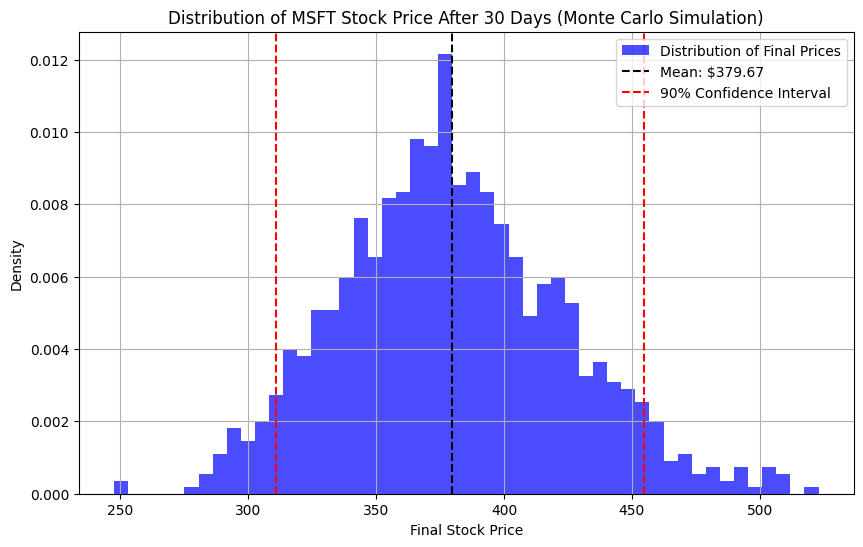

In [5]:

# 10. Monte Carlo Simulation with Geometric Brownian Motion (GBM)
# Calculate historical returns and volatility
daily_returns = data['Close'].pct_change().dropna()
annualized_return = daily_returns.mean() * 252  # Annualized expected return
annualized_volatility = daily_returns.std() * np.sqrt(252)  # Annualized volatility

# Parameters for Monte Carlo Simulation
forecast_horizon = 30  # Forecast 30 trading days into the future
num_simulations = 1000  # Number of simulations
dt = 1/252  # Time step (1 trading day, assuming 252 trading days per year)

# Use the last actual price as the starting point (more realistic for financial analysis)
last_actual_price = y_test_inv[-1]  # Last actual price in the test set
print(f"Starting Price for Monte Carlo Simulation: ${last_actual_price:.2f}")

# Monte Carlo Simulation using GBM
np.random.seed(42)  # For reproducibility
simulated_paths = np.zeros((forecast_horizon, num_simulations))
simulated_paths[0] = last_actual_price

for t in range(1, forecast_horizon):
    # GBM formula: S(t+1) = S(t) * exp((mu - sigma^2/2) * dt + sigma * sqrt(dt) * Z)
    random_shocks = np.random.normal(loc=0, scale=1, size=num_simulations)
    drift = (annualized_return - 0.5 * annualized_volatility**2) * dt
    diffusion = annualized_volatility * np.sqrt(dt) * random_shocks
    simulated_paths[t] = simulated_paths[t-1] * np.exp(drift + diffusion)

# Generate future dates for plotting
last_date = test_dates[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_horizon, freq='B')

# 11. Plot Monte Carlo Simulation Results
plt.figure(figsize=(12, 6))
# Plot the last 100 days of test observations for context
plt.plot(test_dates[-100:], y_test_inv[-100:], label='Test Observations', color='pink')
# Plot all simulated paths with transparency
for i in range(num_simulations):
    plt.plot(future_dates, simulated_paths[:, i], color='gray', alpha=0.05)
# Plot the mean simulation path
plt.plot(future_dates, np.mean(simulated_paths, axis=1), label='Mean Forecast', color='black', linewidth=2)
# Plot 90% confidence interval
plt.fill_between(future_dates,
                 np.percentile(simulated_paths, 5, axis=1),
                 np.percentile(simulated_paths, 95, axis=1),
                 color='gray', alpha=0.3, label='90% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Monte Carlo Simulation of MSFT Stock Price (GBM)')
plt.legend()
plt.grid()
plt.show()

# 12. Calculate Financial Metrics from Monte Carlo Simulation
# Final prices after 30 days
final_prices = simulated_paths[-1]

# Summary statistics
mean_forecast = np.mean(final_prices)
median_forecast = np.median(final_prices)
lower_bound = np.percentile(final_prices, 5)
upper_bound = np.percentile(final_prices, 95)

print(f"Monte Carlo Simulation Results (Day {forecast_horizon}):")
print(f"Mean Forecasted Price: ${mean_forecast:.2f}")
print(f"Median Forecasted Price: ${median_forecast:.2f}")
print(f"90% Confidence Interval: ${lower_bound:.2f} - ${upper_bound:.2f}")

# Expected return and risk metrics
expected_return = (mean_forecast - last_actual_price) / last_actual_price * 100
print(f"Expected Return over {forecast_horizon} days: {expected_return:.2f}%")

# Value at Risk (VaR) at 95% confidence level
var_95 = last_actual_price - np.percentile(final_prices, 5)
print(f"Value at Risk (VaR) at 95% Confidence Level: ${var_95:.2f}")

# Probability of price dropping below a threshold (e.g., 10% below current price)
threshold_price = last_actual_price * 0.9
prob_below_threshold = np.mean(final_prices < threshold_price) * 100
print(f"Probability of Price Dropping Below ${threshold_price:.2f} (10% below current): {prob_below_threshold:.2f}%")

# 13. Plot Distribution of Final Prices
plt.figure(figsize=(10, 6))
plt.hist(final_prices, bins=50, density=True, alpha=0.7, color='blue', label='Distribution of Final Prices')
plt.axvline(mean_forecast, color='black', linestyle='--', label=f'Mean: ${mean_forecast:.2f}')
plt.axvline(lower_bound, color='red', linestyle='--', label='90% Confidence Interval')
plt.axvline(upper_bound, color='red', linestyle='--')
plt.xlabel('Final Stock Price')
plt.ylabel('Density')
plt.title('Distribution of MSFT Stock Price After 30 Days (Monte Carlo Simulation)')
plt.legend()
plt.grid()
plt.show()